# I. Returns

### 1. Prices to Returns
We'll work the very basics of Returns - computing returns, and compounding a sequence of returns.

$ R_{t, t+1} = \frac{P_{t+1} - P_{t}}{P_{t}} $  
or alternately  
$ R_{t, t+1} = \frac{P_{t+1}}{P_{t}} - 1$  
  
Let's start with a set of prices for a stock "A", in a python list:

In [1]:
prices_a = [8.7, 8.91, 8.71]

In R or another language that supports vectors, we might expect something like this to work:

```python
returns_a = prices_a[:-1]/prices_a[1:] - 1
```

However, since Python lists do not operate as vectors, that will not work, generating an error about "/" not working for lists.


Instead, we can convert them to a `numpy` array. Numpy arrays _do_ behave like vectors, so this works:

In [2]:
import numpy as np

prices_a = np.array([8.70, 8.91, 8.71])
prices_a

array([8.7 , 8.91, 8.71])

In [3]:
prices_a[1:]/prices_a[:-1] - 1

array([ 0.02413793, -0.02244669])

Now, let's add a few more days of prices and introduce a second stock. Let's call these two stocks "BLUE" and "ORANGE". Instead of using raw numpy arrays, we are going to use the far more powerful Pandas DataFrame, which wraps the functionality of numpy into a very convenient and easy to use data structure called a DataFrame. Note how the DtaFrame has two nicely indexed columns as well as a row index that by default runs from 0 to 4.

In [4]:
import pandas as pd

prices = pd.DataFrame({"BLUE": [8.70, 8.91, 8.71, 8.43, 8.73],
                       "ORANGE": [10.66, 11.08, 10.71, 11.59, 12.11]})

In [5]:
prices

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


**WARNING**

However, because Pandas DataFrames will align the row index (in this case: 0, 1, 2, 3, 4) the exact same code fragment will not work as you might expect.

In [6]:
prices.iloc[1:]

,BLUE,ORANGE
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [7]:
prices.iloc[:-1]

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59


In [8]:
prices.iloc[1:]/prices.iloc[:-1] - 1

,BLUE,ORANGE
0,NaN,NaN
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,NaN,NaN


In [9]:
prices.iloc[1:].values/prices.iloc[:-1] - 1

,BLUE,ORANGE
0,0.024138,0.039400
1,-0.022447,-0.033394
2,-0.032147,0.082166
3,0.035587,0.044866


We could have also used the values in the denominator:

In [10]:
prices.iloc[1:]/prices.iloc[:-1].values - 1

,BLUE,ORANGE
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


However, there are a couple of ways to do this without extracting the values, and these are probably a bit cleaner and more readable. The first option is to use the `.shift()` method on the array, which realigns the indices.

In [11]:
prices

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


Since we want to get the row at index 0 (8.84 and 10.66) to line up with the row at index 1 (8.54 and 10.30) so we can divide the 2nd row (at index 1) by the first row (at index 0) we want to shift the rows in the denominator by 1 ... which we do with `.shift(1)`

In [12]:
prices.shift(1)

,BLUE,ORANGE
0,NaN,NaN
1,8.70,10.66
2,8.91,11.08
3,8.71,10.71
4,8.43,11.59


So, now we can obtain the returns on each day as follows:

In [13]:
returns = prices/prices.shift(1) - 1
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


Note how we cannot compute returns for the first day, because we dont have the closing price for the previous day. In general, we lose one data point when we go from prices to returns.

Finally, there is a built-in method in DataFrame that computes the percent change from one row to another. Since that is exactly what a return is (the percent change in price) we can just use this method to compute the return.

In [14]:
returns = prices.pct_change()
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


### 2. Reading data from a CSV file
Since typing in returns is tedious, let's read the data in from a file. Pandas provides a convenient and simple way to read in a CSV file of the returns.

In [15]:
prices = pd.read_csv('data\sample_prices.csv')
prices

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [16]:
returns = prices.pct_change()
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


In [17]:
returns.mean()

BLUE      0.01
ORANGE    0.01
dtype: float64

In [18]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

<AxesSubplot:>

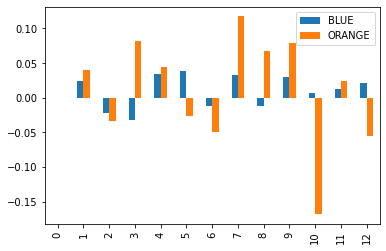

In [19]:
returns.plot.bar()

<AxesSubplot:>

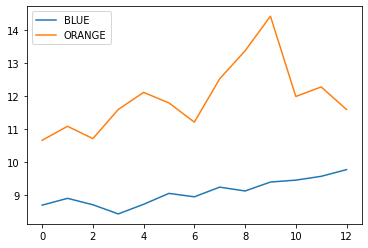

In [20]:
prices.plot()

In [21]:
%matplotlib inline

### 3. Compounding Returns

Now that we have a series of 12 monthly returns, we can produce the compounded return by multiplying the individual period returns, as long as the returns are expressed as growth rates in what I call "1+R" format.

To compound the returns, all we need to do is add 1 to each return and then multiply them. The result is itself in "1+R" format, so we need to subtract 1.

Let's compute the compounded return of our two series. 

In [22]:
returns + 1

,BLUE,ORANGE
0,NaN,NaN
1,1.023621,1.039662
2,0.978193,0.966362
3,0.968237,1.082232
4,1.034477,1.044544
5,1.037786,0.973619
6,0.988548,0.950813
7,1.032676,1.117008
8,0.987419,1.067353
9,1.029581,1.078249


In [23]:
np.prod(returns+1)

BLUE      1.123310
ORANGE    1.087167
dtype: float64

In [24]:
(returns+1).prod()

BLUE      1.123310
ORANGE    1.087167
dtype: float64

In [25]:
(returns+1).prod()-1

BLUE      0.123310
ORANGE    0.087167
dtype: float64

In [26]:
(((returns+1).prod()-1)*100).round(2)

BLUE      12.33
ORANGE     8.72
dtype: float64

### 4. Annualized Returns
To annualize a return for a period, you compound the return for as many times as there are periods in a year. For instance, to annualize a monthly return you compund that return 12 times. The formula to annualize a monthly return $R_m$ is:

$$ (1+R_m)^{12} - 1$$

To annualize a quarterly return $R_q$ you would get:

$$ (1+R_q)^{4} - 1$$

And finally, to annualize a daily return $R_d$ you would get:

$$ (1+R_d)^{252} - 1$$

For example, to annualize a 1% monthly, and 4% quarterly and a 0.01% daily return you would do:

In [27]:
rm = 0.01
(1+rm)**12 - 1

0.12682503013196977

In [28]:
rq = 0.04
(1+rq)**4 - 1

0.1698585600000002

In [29]:
rd = 0.0001

(1+rd)**252 - 1

0.025518911987694626

# II. Risk

### 1. Volatility and Risk
We've seen that the volatility is measured by the average squared deviation from the mean, which is the standard deviation.

Let's read the sample returns that we've been working with.

In [30]:
prices = pd.read_csv("data/sample_prices.csv")
returns = prices.pct_change()
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


Notice that the first set of returns are NaN, which is Pandas way of saying that it's an NA. We can drop that row using the `.dropna()` method.

In [31]:
returns = returns.dropna()
returns

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


Let's compute the standard deviation from first principals:

In [32]:
deviations = returns - returns.mean()
squared_deviations = deviations**2
mean_squared_deviations = squared_deviations.mean()

volatility = np.sqrt(mean_squared_deviations)
volatility

BLUE      0.022957
ORANGE    0.076212
dtype: float64

Let's see if we get the same answer when we use the built-in `.std()` method.

In [33]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

Why don't they match? Because, by default, the `.std()` method computes the _sample standard deviation_ which means that it uses the denominator of $n-1$. On the other hand, we computed the _population_ standard deviation, which uses a numerator of $n$. Since the observed returns are thought of as observed samples from a distribution, it is probably more accurate to use the denominator of $n-1$, so let's redo our calculation to see if we get the same number.

To get the number of observations, we can use the `.shape` attribute of a DataFrame that returns a tuple of the number of rows and columns.

In [34]:
returns.shape

(12, 2)

Just as we can with a list, we can access the elements of a tuple using an index, starting at 0. Therefore, to get the number of rows in the DataFrame, we extract the 0th element of the tuple.

In [35]:
number_of_obs = returns.shape[0]
mean_squared_deviations = squared_deviations.sum()/(number_of_obs-1)
volatility = np.sqrt(mean_squared_deviations)
volatility

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [36]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

### 2. Annualizing Volatility

We annualize volatility by scaling (multiplying) it by the square root of the number of periods per observation

Therefore, to annualize the volatility of a monthly series, we muiltiply it by the square root of 12. Instead of using the `np.sqrt()` we can raise it to the power of $0.5$

In [37]:
annualized_vol = returns.std()*(12**0.5)
annualized_vol

BLUE      0.083060
ORANGE    0.275747
dtype: float64

### 3. Risk Adjusted Returns

Let's get beyond the sample data series and start working with some real data. Read in the monthly returns of a set of 10 portfolios formed on market caps, or market equities of the companies. Of the 10 portfolios, we only want to look at the largest cap and the smallest cap companies:

In [38]:
me_m = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",
                   header=0, index_col=0, parse_dates=True, na_values=-99.99)
me_m.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [39]:
cols = ['Lo 10', 'Hi 10']
returns = me_m[cols]
returns.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


Note that the data is already given in percentages (i.e 4.5 instead of 0.045) and we typically want to use the actual numbers (i.e. 0.045 instead of 4.5) so we should divide the raw data from the file by 100.

In [40]:
returns = returns/100

<AxesSubplot:>

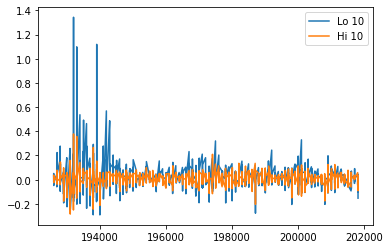

In [41]:
returns.plot()

In [42]:
returns.columns = ['SmallCap', 'LargeCap']

<AxesSubplot:>

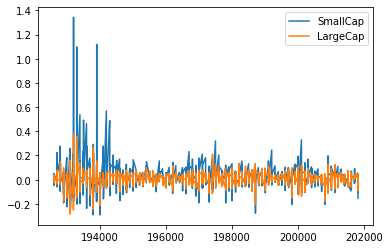

In [43]:
returns.plot()

In [44]:
annualized_vol = returns.std()*np.sqrt(12)
annualized_vol

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

We can now compute the annualized returns as follows:

In [62]:
n_months = returns.shape[0]
return_per_month = (returns+1).prod()**(1/n_months) - 1
return_per_month

SmallCap    0.012986
LargeCap    0.007423
dtype: float64

In [60]:
annualized_return = (return_per_month + 1)**12-1

In [61]:
annualized_return = (returns+1).prod()**(12/n_months) - 1
annualized_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [48]:
annualized_return/annualized_vol

SmallCap    0.454825
LargeCap    0.497063
dtype: float64

In [49]:
riskfree_rate = 0.03
excess_return = annualized_return - riskfree_rate
sharpe_ratio = excess_return/annualized_vol
sharpe_ratio

SmallCap    0.373346
LargeCap    0.336392
dtype: float64

#### For the quiz

#### Question 1, 2, 3, 4

In [83]:
cols = ['Lo 20', 'Hi 20']
returns2 = me_m[cols]
returns2.head()

,Lo 20,Hi 20
192607,-0.57,3.33
192608,3.84,2.33
192609,-0.48,-0.09
192610,-3.29,-2.95
192611,-0.55,3.16


In [86]:
returns2 = returns2/100

<AxesSubplot:>

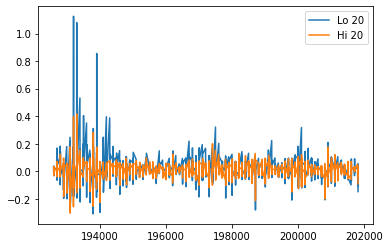

In [87]:

returns2.plot()

In [88]:
n_months = returns2.shape[0]
return_per_month = (returns2 + 1).prod()**(1/n_months) - 1
return_per_month

Lo 20    0.011860
Hi 20    0.007859
dtype: float64

In [89]:
annualized_return = (return_per_month + 1)**12-1
annualized_return

Lo 20    0.151977
Hi 20    0.098490
dtype: float64

In [91]:
annualized_return = (returns2 + 1).prod()**(12/n_months) - 1
annualized_return

Lo 20    0.151977
Hi 20    0.098490
dtype: float64

In [104]:
annualized_vol = returns2.std()*np.sqrt(12)
annualized_vol

Lo 20    0.336701
Hi 20    0.195116
dtype: float64

#### Question 5-12

In [100]:
import edhec_risk_kit as erk

In [99]:
%load_ext autoreload
%autoreload 2

In [107]:
rts = erk.get_ffme_returns()

In [108]:
rts.std()*np.sqrt(12)

SmallCap    0.336701
LargeCap    0.195116
dtype: float64

In [121]:
n_months = rts['1999':'2015'].shape[0]
annualized_return = (rts['1999':'2015'] + 1).prod()**(12/n_months) - 1
annualized_return

SmallCap    0.114426
LargeCap    0.062865
dtype: float64

In [122]:
annualized_vol = rts['1999':'2015'].std()*np.sqrt(12)
annualized_vol

SmallCap    0.228894
LargeCap    0.172713
dtype: float64

In [124]:
erk.drawdown(rts['1999':'2015']['SmallCap']).min()

Wealth           1034.189842
Previous Peak    1111.400000
Drawdown           -0.624809
dtype: float64

In [125]:
erk.drawdown(rts['1999':'2015']['SmallCap']).idxmin()

Wealth           1999-03
Previous Peak    1999-01
Drawdown         2009-02
dtype: period[M]

In [126]:
erk.drawdown(rts['1999':'2015']['LargeCap']).min()

Wealth            721.706638
Previous Peak    1015.300000
Drawdown           -0.552735
dtype: float64

In [127]:
erk.drawdown(rts['1999':'2015']['LargeCap']).idxmin()

Wealth           2002-09
Previous Peak    1999-01
Drawdown         2009-02
dtype: period[M]

#### Question 13-16

In [128]:
hfi = erk.get_hfi_returns()

C:\Users\NGUYEN Xuan Vinh\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '31/01/1997' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\NGUYEN Xuan Vinh\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '28/02/1997' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\NGUYEN Xuan Vinh\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '31/03/1997' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\NGUYEN Xuan Vinh\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '30/

In [132]:
hfi['2009':].tail()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
2018-07,0.0021,-0.0058,0.0093,0.0040,-0.0010,0.0055,0.0022,-0.0014,0.0067,-0.0021,0.0045,-0.0052,0.0018
2018-08,0.0024,0.0166,0.0002,-0.0277,0.0004,0.0011,0.0017,-0.0007,0.0035,0.0050,-0.0002,-0.0214,0.0015
2018-09,0.0034,-0.0054,0.0050,-0.0110,-0.0016,0.0032,0.0036,0.0006,-0.0023,0.0028,0.0018,0.0036,-0.0022
2018-10,-0.0073,-0.0314,-0.0158,-0.0315,-0.0129,-0.0257,-0.0023,-0.0096,-0.0402,-0.0080,-0.0109,0.0237,-0.0269
2018-11,-0.0068,-0.0053,-0.0193,0.0120,-0.0211,-0.0034,-0.0067,-0.0087,-0.0044,0.0119,-0.0063,-0.0021,-0.0071


In [134]:
erk.semideviation(hfi['2009':]).sort_values()

Fixed Income Arbitrage    0.003321
Merger Arbitrage          0.003611
Global Macro              0.005075
Equity Market Neutral     0.005186
Relative Value            0.005711
Convertible Arbitrage     0.006681
Funds Of Funds            0.007948
Distressed Securities     0.009498
Event Driven              0.010135
CTA Global                0.010996
Long/Short Equity         0.012139
Emerging Markets          0.015276
Short Selling             0.021240
dtype: float64

In [135]:
erk.skewness(hfi['2009':]).sort_values()

Equity Market Neutral    -0.896327
Funds Of Funds           -0.646908
Merger Arbitrage         -0.551065
Event Driven             -0.488821
Long/Short Equity        -0.463703
Distressed Securities    -0.254944
Emerging Markets          0.033123
CTA Global                0.052062
Relative Value            0.159953
Global Macro              0.348184
Short Selling             0.456518
Fixed Income Arbitrage    1.121453
Convertible Arbitrage     1.305911
dtype: float64

In [137]:
erk.kurtosis(hfi['2000':]).sort_values()

CTA Global                 2.845022
Global Macro               3.653278
Short Selling              4.352758
Long/Short Equity          4.472589
Merger Arbitrage           4.520785
Event Driven               5.543444
Emerging Markets           5.941289
Distressed Securities      6.231720
Funds Of Funds             7.584725
Relative Value            12.731096
Equity Market Neutral     20.329621
Convertible Arbitrage     23.001449
Fixed Income Arbitrage    33.378729
dtype: float64